<a href="https://colab.research.google.com/github/basakozgurr/badlab_project/blob/main/hafta_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Görüntü İşleme

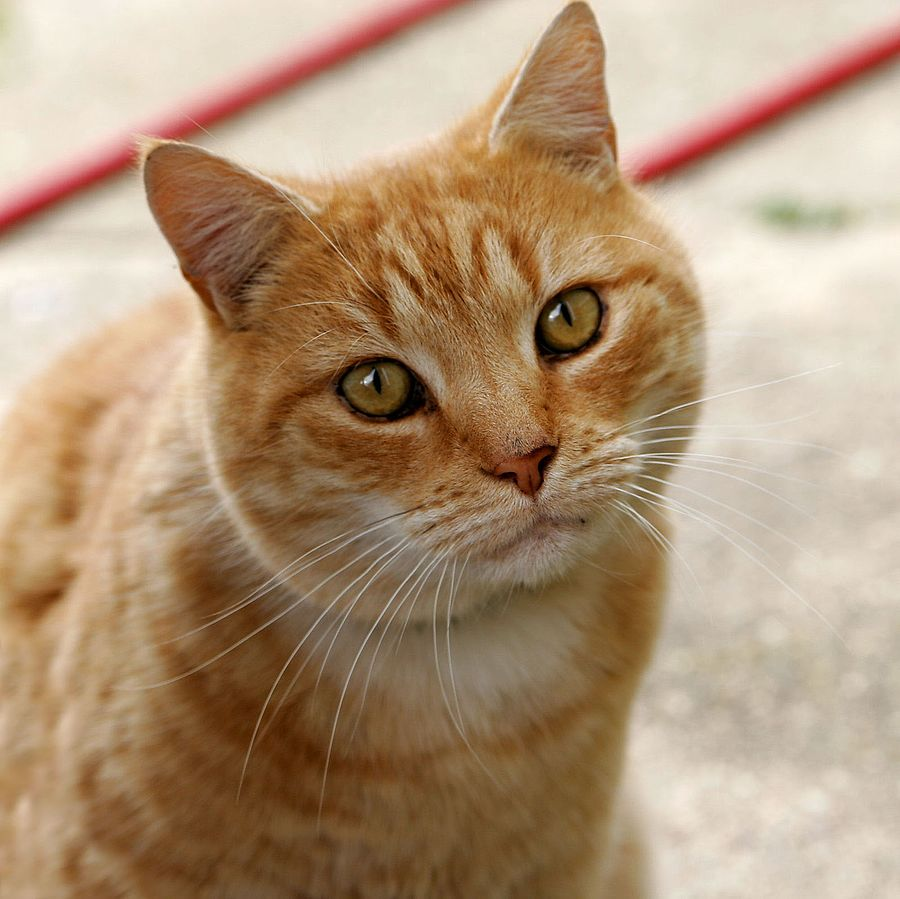

-1


In [2]:
from IPython import get_ipython
from IPython.display import display
# %% [markdown]
import cv2  # OpenCV
import matplotlib.pyplot as plt  # Matplotlib
import numpy as np  # NumPy

# %%
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab

resim=cv2.imread("cat.jpg") #resim okuma işlemini yapar
cv2_imshow(resim) # Use cv2_imshow instead of cv2.imshow to display the image in Colab
k=cv2.waitKey(0) #hızlı çalışmasını engeller ve resmi gösterir
#cv2.destroyAllWindows(resim) #pencereyi kapatır
#resim=cv2.imread("cat.jpg",0) #resmi siyah beyaz okur
print(k) #hexadecim değeri verir
if k==ord("q"): #esc tuşuna basınca kapatır
  print("q tuşuna basıldı") #çıkış yaptırır
  cv2.imwrite("cat.jpg",resim) #resim kaydetme işlemi yapar


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


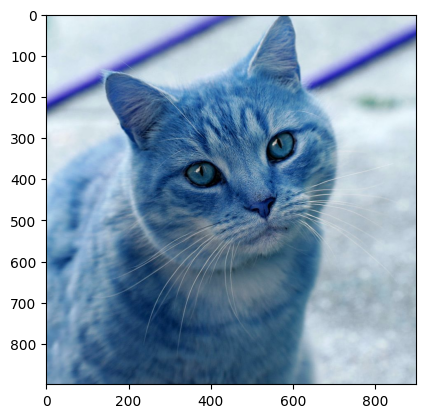

In [ ]:
plt.imshow(resim,cmap="gray") #resim gösterme işlemi yapar
plt.show()

cv2.namedWindow("resim",cv2.WINDOW_AUTOSIZE) #resim penceresini açar
cv2.namedWindow("resim",cv2.WINDOW_NORMAL) #resmi büyütür, küçültür, oynatır



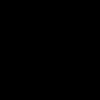

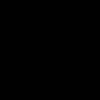

In [6]:
import numpy as np  # NumPy
from google.colab.patches import cv2_imshow # Make sure to import cv2_imshow here as well

sifir=np.zeros([100,100]) #siyah resim oluşturur
bir=np.ones([100,100]) #beyaz resim oluşturur
cv2_imshow(sifir)
cv2_imshow(bir)

In [3]:
import cv2
cam=cv2.VideoCapture(2) #videoyu tanıttık
while True:
  ret,frame=cam.read() #videoyu okuduk ret=okuyup/okunmadığını verir

  if not ret:
    print("kameradan görüntü okunamadı")
    break

  cv2_imshow(frame) #videoyu gösterdik

cam.release() #kamerayı serbest bırakır
cv2.destroyAllWindows() #pencereyi kapatır



kameradan görüntü okunamadı


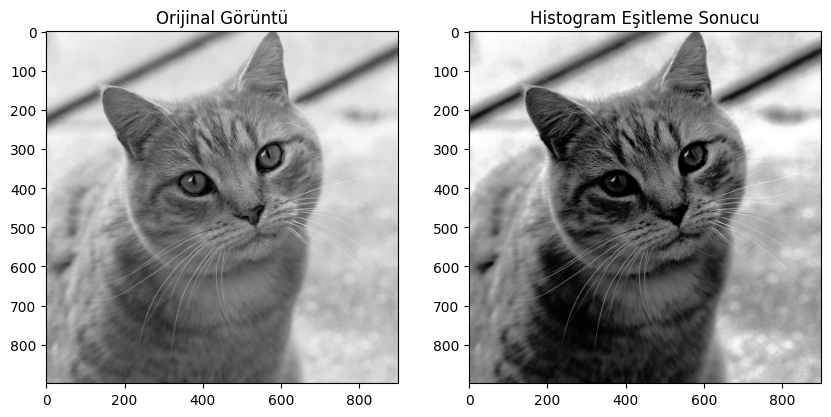

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü gri tonlamaya çevirerek oku
# Check if the image path is correct and the file exists
image = cv2.imread("cat.jpg", cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read image file. Please check the file path.")
else:
    # Histogram Eşitleme
    equalized = cv2.equalizeHist(image)

    # Sonuçları görselleştir
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Orijinal Görüntü")
    plt.subplot(1, 2, 2)
    plt.imshow(equalized, cmap="gray")
    plt.title("Histogram Eşitleme Sonucu")
    plt.show()


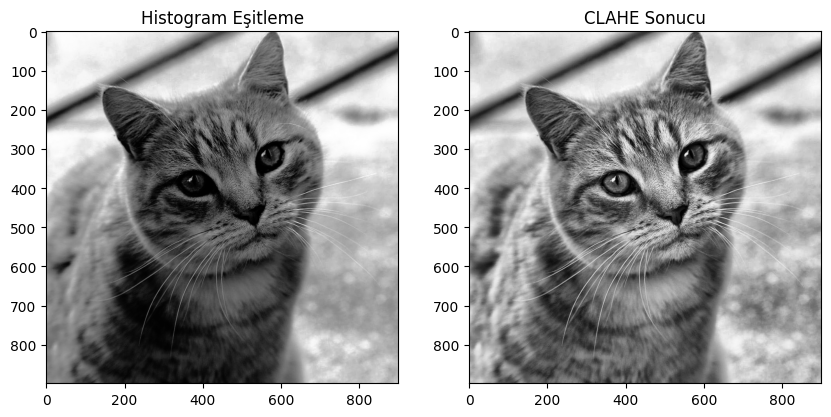

In [10]:
# CLAHE nesnesini oluştur (Clip Limit: 2.0, Grid Size: 8x8)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# CLAHE uygula
clahe_image = clahe.apply(image)

# Sonuçları görselleştir
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized, cmap="gray")
plt.title("Histogram Eşitleme")

plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap="gray")
plt.title("CLAHE Sonucu")
plt.show()


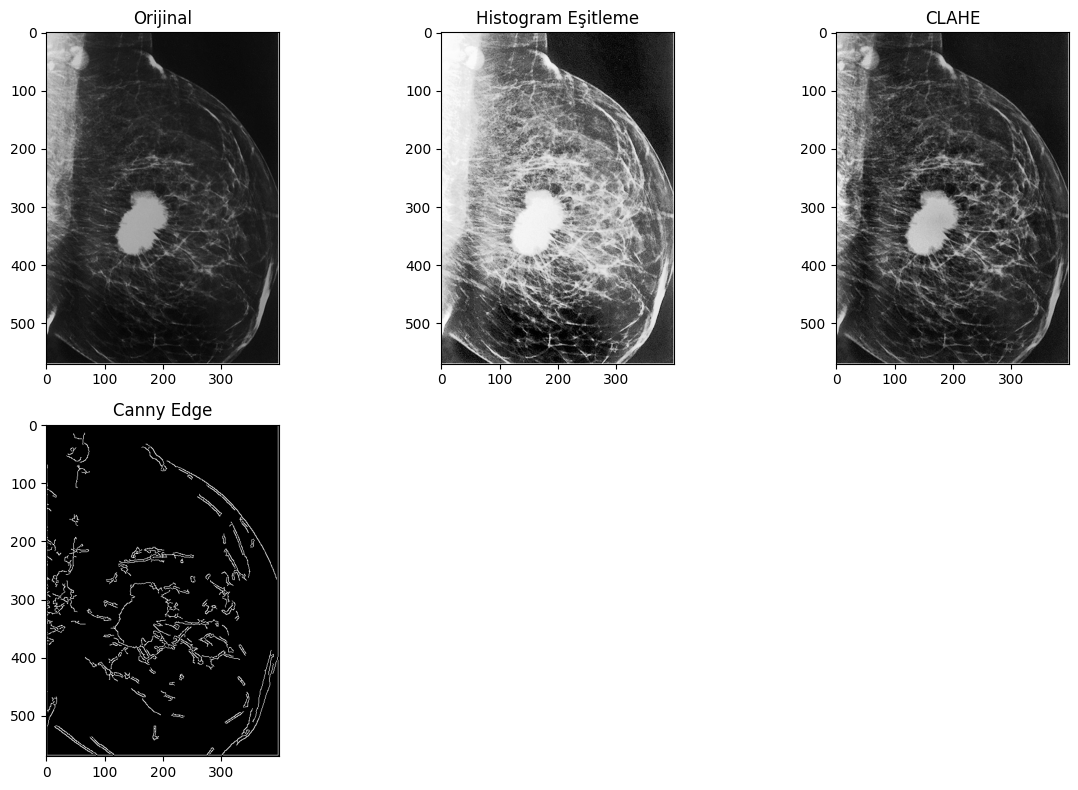

True

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Mamografi görüntüsünü oku
image = cv2.imread("mamografi.jpg", cv2.IMREAD_GRAYSCALE)

# 2️⃣ Gaussian Blur ile gürültüyü azalt
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# 3️⃣ Histogram Eşitleme uygula
equalized = cv2.equalizeHist(image)

# 4️⃣ CLAHE uygula
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# 5️⃣ Canny Edge Detection uygula
edges = cv2.Canny(blurred, 50, 150)

# Sonuçları görselleştir
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title("Orijinal")
plt.subplot(2, 3, 2), plt.imshow(equalized, cmap='gray'), plt.title("Histogram Eşitleme")
plt.subplot(2, 3, 3), plt.imshow(clahe_image, cmap='gray'), plt.title("CLAHE")
plt.subplot(2, 3, 4), plt.imshow(edges, cmap='gray'), plt.title("Canny Edge")
plt.tight_layout()
plt.show()

# Çıktıları kaydet
cv2.imwrite("equalized.jpg", equalized)
cv2.imwrite("clahe.jpg", clahe_image)
cv2.imwrite("edges.jpg", edges)
